# Preparation and Data Cleaning

In [3]:
#Importing necessary libraries for the analysis
import numpy as np
import scipy as sp
import scipy.stats as st

# Data handling
import pandas as pd

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

# Statistical tools
from statsmodels.distributions.empirical_distribution import ECDF
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Creating a directory for the figures that will be generated.
import os
if not os.path.exists('Figures'):
    os.makedirs('Figures')

In [4]:
# Importing the csv file into python
ef_index_df = pd.read_csv('index2021_data-2.csv')

In [5]:
# Removing rows with missing values from the analysis
ef_index2 = ef_index_df.dropna()
print( "Started with " + str(len(ef_index_df)) + 
      " rows of data and finished with " + str(len(ef_index2)) +
      " NaN-free ones."
)

Started with 185 rows of data and finished with 173 NaN-free ones.


In [6]:
# Creating a univariate dataset of the economic freedom index
ef_score = ef_index2.ie_score.values
# Retreiving summary statistics for the economic freedom index
ef_index2['ie_score'].describe()

count    173.000000
mean      62.224855
std        9.957819
min       24.700000
25%       55.700000
50%       62.100000
75%       69.300000
max       89.700000
Name: ie_score, dtype: float64

In [7]:
# Creating a variable for the mean economic freedom score
ef_mean = np.mean(ef_score)

# Univariate Analysis

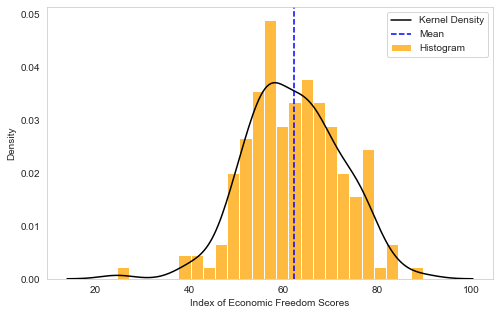

In [23]:
# Setting the dimensions of the figure
widthInInches = 8
heightInInches = 5
plt.figure(figsize=(widthInInches, heightInInches))
  
# Using the installed version of Seaborn.
seabornVersionStr = sns.__version__
versionStrParts = seabornVersionStr.split('.')

# Creating a combined histogram and kernel density plot
kdeAxes = sns.kdeplot( ef_score, color="black", label="Kernel Density")
sns.histplot( ef_score, stat="density", color = "orange", label="Histogram", bins=25)

# Showing the mean on the figure
plt.axvline(ef_mean, color='blue', linestyle='dashed', label="Mean")

# Labelling and saving the figure
plt.xlabel('Index of Economic Freedom Scores')
plt.legend()
plt.savefig('Figures/c1_univar.pdf',format='pdf')

# Multivariate Analysis

In [11]:
# Creating univariate datasets for the variables to be used in a multivariate analysis
corp_tax = ef_index2.corp_tax.values
income_tax = ef_index2.income_tax.values

In [12]:
# Creating a list with the two variables
multi_var = [corp_tax, income_tax]

In [13]:
# Retreiving the summary statistics for our coporation tax variable
ef_index2['corp_tax'].describe()

count    173.000000
mean      23.222543
std        8.679534
min        0.000000
25%       19.000000
50%       25.000000
75%       30.000000
max       50.000000
Name: corp_tax, dtype: float64

In [14]:
# Retreiving the summary statistics for our income tax variable
ef_index2['income_tax'].describe()

count    173.000000
mean      28.541908
std       13.387427
min        0.000000
25%       20.000000
50%       30.000000
75%       37.000000
max       60.000000
Name: income_tax, dtype: float64

In [15]:
# Producing a correlation matrix
R = np.corrcoef(multi_var)
print(R)

[[1.         0.57736268]
 [0.57736268 1.        ]]


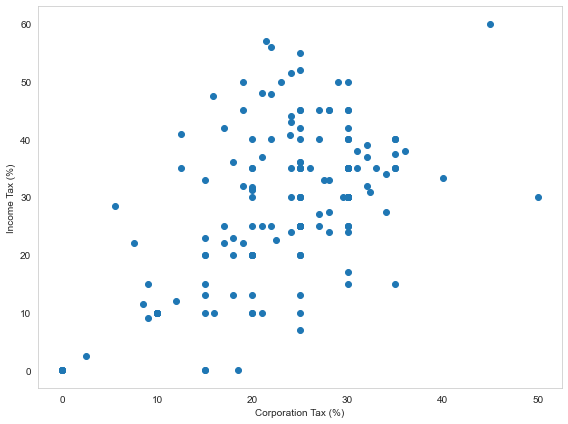

In [16]:
# Plotting the two variables on a scatter plot
plt.figure(figsize=(8,6))
plt.scatter(ef_index2['corp_tax'],ef_index2['income_tax']) 
plt.xlabel('Corporation Tax (%)')
plt.ylabel('Income Tax (%)')
plt.tight_layout()
plt.savefig('Figures/c1_multivar2.pdf',format='pdf')

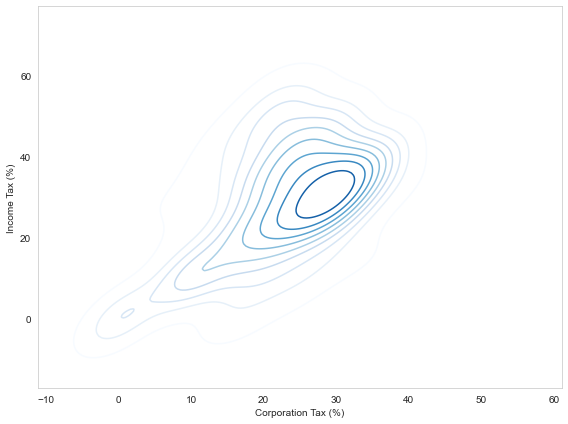

In [17]:
# Plotting the vairables on a 2D Kernel Density Plot
plt.figure(figsize=(8,6))
sns.kdeplot(x=corp_tax, y=income_tax, cmap="Blues")
plt.xlabel('Corporation Tax (%)')
plt.ylabel('Income Tax (%)')
plt.tight_layout()
plt.savefig('Figures/c1_multivar3.pdf',format='pdf')